In [21]:
import radd
from radd import build


from scipy.stats.mstats import mquantiles as mq
from scipy.stats.mstats_extras import mjci

homedir = os.path.expanduser('~')
cox = pd.read_csv(os.path.join(homedir, "Dropbox/Projects/Coxon/coxon_behav_data_binned.csv"))
#cox = pd.read_csv(os.path.join(homedir, "Dropbox/Projects/Coxon/coxon_behav_data.csv"))
pro = pd.read_csv(os.path.join(homedir, "Dropbox/Projects/SS/Proactive/pro_data.csv"))
re = pd.read_csv(os.path.join(homedir, "Dropbox/Projects/SS/Reactive/Re_Data.csv"), index_col=0)
ssb = pd.read_csv(os.path.join(homedir, "Dropbox/Projects/SSBayes/alldata_clean.csv"), index_col=0)

In [18]:
idx_cols = [np.hstack(['acc', quant_cols]).tolist()]*rem.nidx*rem.nconds*rem.nlevels

In [22]:
from radd import CORE, dfhandler
CORE=reload(CORE)
build=reload(build)
analyze=reload(analyze)
dfhandler = reload(dfhandler)

In [17]:
quant_cols = np.asarray(rem.percentiles*100).astype(int)

In [60]:
data = rem.data

idx = rem.idx
nidx = rem.nidx
conds = rem.conds
nconds = rem.nconds
levels = rem.levels
nlevels = rem.nlevels
nsplits = nlevels * nconds
nrows = nidx * nlevels * nconds

idx_conds = np.hstack(['idx', conds]).tolist()
params = sorted(rem.inits.keys())
rem.handler.__get_headers__(params)
#rem.handler.make_observed_groupDFs()

if rem.fit_on=='subjects':
    rem.observed = [np.array(rem.datdf[i : i+nsplits].values) for i in range(0, nrows, nsplits)]
    rem.observed_flat = [idxdata.mean(axis=0) for idxdata in rem.observed]


In [62]:
nperc = rem.percentiles.size
qp_cols = rem.handler.qp_cols
qcols = qp_cols[-nperc*2:]
nrows = rem.nidx * rem.nlevels * rem.nconds
ncols = len(qp_cols)

idx_conds = np.hstack(['idx', rem.conds]).tolist()
ic_grp = rem.data.groupby(idx_conds)

rem.datdf = ic_grp.apply(rem.rangl_data).unstack().unstack().sortlevel(1)
rem.dfvals = [rem.datdf.values[i].astype(float) for i in xrange(nrows)]

# get idx-specific column headers (in case not all ssd's shared)
if hasattr(rem, 'delays'):
    idx_ssd = [np.sort(df[df.ttype=='stop'].ssd.unique()) for _, df in ic_grp]
    idx_cols = [['acc'] + ixssd.tolist() + qcols for ixssd in idx_ssd]
    idx_ssd = [ixssd*.001 for ixssd in idx_ssd]

In [63]:
idx_cols[0]

['acc',
 200,
 250,
 300,
 350,
 400,
 'c10',
 'c30',
 'c50',
 'c70',
 'c90',
 'e10',
 'e30',
 'e50',
 'e70',
 'e90']

In [64]:
observedDF = pd.DataFrame(np.zeros((nrows, ncols))*np.nan, columns=qp_cols)
observedDF.loc[:, idx_conds] = rem.datdf.reset_index()[idx_conds].values

for rowi in xrange(nrows):
    observedDF.loc[rowi, idx_cols[rowi]] = rem.dfvals[rowi]

In [72]:
rem = build.Model(kind='xdpm', data=re, depends_on={'v':'Cond'}, weighted=True, fit_on='subjects')
#coxm = build.Model(kind='xdpm', data=cox, depends_on={'v':'Cond'}, weighted=True, fit_on='subjects')


In [ ]:
rem.

In [62]:
ic_grp = rem.data.groupby(['idx', 'Cond'])
datdf = ic_grp.apply(rem.rangl_data).unstack().unstack().sortlevel(1)

In [66]:
rem.__make_dataframes__()
#coxm.__make_dataframes__()
#avgm.__make_dataframes__()
#m.observed_flat

In [68]:
rem.__get_wts__()

In [7]:

idx_var_wts = [np.median(cts)/cts for cts in idx_var_counts]
idx_var_pwts = [np.append(1., iwts) for iwts in idx_var_wts]

NameError: name 'idx_var_counts' is not defined

In [8]:
quantdf = analyze.mj_quanterr(df=coxm.data, conds=conds, percentiles=coxm.percentiles)
nidx = len(coxm.indx)
quant_cols = np.asarray(coxm.percentiles*100).astype(int)
idx_qwts = quantdf.loc[:, quant_cols].values.reshape(nidx * 2, 2 * 5)

In [18]:
idx_qwts[0]

array([ 0.77681,  1.45186,  1.18323,  0.85541,  0.96141,  0.64384,
        1.01316,  1.12303,  0.6994 ,  0.30729])

In [13]:

idx_pwts = [np.ones(idat.size - 2 * 5) for idat in coxm.dframes['dfvals']]

In [9]:
idx_pwts = idx_var_pwts

cost_wts = np.array([np.append(pw, qw) for pw, qw in zip(idx_pwts, idx_qwts)])
#[np.hstack(cost_wts[i:i+2]) for i in range(0, nidx*2, 2)]

In [10]:
cost_wts

array([ array([ 1.     ,  4.5    ,  1.38462,  0.85714,  0.75   ,  1.     ,
        0.77681,  1.45186,  1.18323,  0.85541,  0.96141,  0.64384,
        1.01316,  1.12303,  0.6994 ,  0.30729]),
       array([ 1.     ,  1.57143,  0.57895,  0.52381,  1.     ,  2.75   ,
        2.33862,  2.23801,  1.8769 ,  2.16512,  1.11815,  1.00337,
        0.74767,  0.58437,  0.99665,  0.56937]),
       array([ 1.     ,  2.7    ,  1.125  ,  0.675  ,  0.71053,  0.9    ,
        1.5    ,  1.26713,  1.06719,  1.09538,  1.31817,  0.48936,
        0.84947,  0.69641,  0.94077,  0.57967,  1.37543]),
       array([ 1.     ,  1.66667,  0.83333,  0.55556,  0.625  ,  1.25   ,
        5.     ,  1.49074,  1.72682,  2.32029,  1.92553,  1.79011,
        0.68143,  0.80738,  0.67626,  0.34865,  0.47449]),
       array([ 1.     ,  3.375  ,  1.125  ,  0.75   ,  0.71053,  0.9    ,
        1.125  ,  1.36421,  1.36129,  1.19636,  1.35125,  0.75967,
        0.01702,  0.83062,  1.13456,  0.6727 ,  0.397  ]),
       array([ 1.  

In [ ]:
coxm.get_wts()

In [11]:
ncond = 2
nidx = len(coxm.indx)

cost_wts = [np.vstack(cost_wts[i:i+ncond]) for i in range(0, nidx*ncond, ncond)]
flat_cost_wts = [idx_cwts.mean(axis=0) for idx_cwts in cost_wts]

In [12]:
flat_cost_wts

[array([ 1.     ,  3.03571,  0.98178,  0.69048,  0.875  ,  1.875  ,
         1.55771,  1.84494,  1.53007,  1.51027,  1.03978,  0.8236 ,
         0.88042,  0.8537 ,  0.84803,  0.43833]),
 array([ 1.     ,  2.18333,  0.97917,  0.61528,  0.66776,  1.075  ,
         3.25   ,  1.37893,  1.39701,  1.70783,  1.62185,  1.13973,
         0.76545,  0.75189,  0.80851,  0.46416,  0.92496]),
 array([ 1.     ,  2.07083,  1.00481,  0.75833,  0.93026,  1.40833,
         2.47917,  1.30559,  1.52429,  1.5365 ,  1.67008,  1.56263,
         0.14817,  0.86229,  0.99551,  0.70268,  0.59587]),
 array([ 1.     ,  1.20833,  1.09502,  0.925  ,  1.30556,  1.75   ,
         1.19361,  2.09572,  1.78013,  1.68263,  1.02359,  0.36143,
         0.85455,  0.75055,  0.82964,  0.44088]),
 array([ 1.     ,  1.5    ,  1.1875 ,  0.62788,  0.60766,  1.28571,
         1.14464,  2.04046,  1.68763,  2.13038,  1.20494,  0.89778,
         0.75241,  0.96124,  0.59718,  0.54296]),
 array([ 1.     ,  1.     ,  0.74603,  0.93542,  1

In [32]:
for i, c in enumerate(cost_wts):
    print(i)
    c.mean(axis=0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41


In [29]:
cost_wts[0].mean(axis=0)#shape

array([ 1.     ,  1.     ,  1.     ,  1.     ,  1.     ,  1.     ,
        1.55771,  1.84494,  1.53007,  1.51027,  1.03978,  0.8236 ,
        0.88042,  0.8537 ,  0.84803,  0.43833])

In [9]:
#df.groupby(columns).apply(get_counts).values
#[cts[:-1] for cts in df.groupby(columns).apply(get_counts).values]
#idx_var_counts = [cts[:-1] for cts in df.groupby(columns).apply(get_counts).values]

[array([ 4, 13, 21, 24, 18]),
 array([ 7, 19, 21, 11,  4]),
 array([10, 24, 40, 38, 30, 18]),
 array([12, 24, 36, 32, 16,  4]),
 array([ 4, 12, 18, 19, 15, 12]),
 array([15, 13, 15, 10,  6,  3]),
 array([12, 13, 20, 18, 17]),
 array([15, 17, 15,  9,  6]),
 array([ 7, 14, 23, 22, 14]),
 array([11,  8, 17, 19,  7]),
 array([15, 21, 16, 15, 13]),
 array([14, 18, 15, 10,  5]),
 array([ 8, 13, 18, 18, 14,  9]),
 array([12, 15, 17, 12,  4,  2]),
 array([ 1,  7, 15, 22, 21, 14]),
 array([10, 12, 11, 15,  9,  5]),
 array([10, 12, 20, 18, 20]),
 array([13, 19, 16, 10,  4]),
 array([ 4, 13, 24, 25, 14]),
 array([16, 15, 14, 12,  5]),
 array([21, 20, 20, 12,  7]),
 array([ 2, 12, 19, 13, 16]),
 array([11, 11, 20, 21, 17]),
 array([17, 15, 16,  9,  5]),
 array([17, 10, 13,  8,  8, 10, 14]),
 array([ 6, 11, 11, 11, 12,  8,  3]),
 array([20, 23, 18, 19]),
 array([11, 20, 20, 11]),
 array([25, 21, 14, 10, 10]),
 array([14, 13, 13, 12, 10]),
 array([11, 18, 23, 16, 12]),
 array([17, 14, 17,  9,  5]),


In [8]:
idx_var_counts

[array([ 4, 13, 21, 24, 18]),
 array([ 7, 19, 21, 11,  4]),
 array([10, 24, 40, 38, 30, 18]),
 array([12, 24, 36, 32, 16,  4]),
 array([ 4, 12, 18, 19, 15, 12]),
 array([15, 13, 15, 10,  6,  3]),
 array([12, 13, 20, 18, 17]),
 array([15, 17, 15,  9,  6]),
 array([ 7, 14, 23, 22, 14]),
 array([11,  8, 17, 19,  7]),
 array([15, 21, 16, 15, 13]),
 array([14, 18, 15, 10,  5]),
 array([ 8, 13, 18, 18, 14,  9]),
 array([12, 15, 17, 12,  4,  2]),
 array([ 1,  7, 15, 22, 21, 14]),
 array([10, 12, 11, 15,  9,  5]),
 array([10, 12, 20, 18, 20]),
 array([13, 19, 16, 10,  4]),
 array([ 4, 13, 24, 25, 14]),
 array([16, 15, 14, 12,  5]),
 array([21, 20, 20, 12,  7]),
 array([ 2, 12, 19, 13, 16]),
 array([11, 11, 20, 21, 17]),
 array([17, 15, 16,  9,  5]),
 array([17, 10, 13,  8,  8, 10, 14]),
 array([ 6, 11, 11, 11, 12,  8,  3]),
 array([20, 23, 18, 19]),
 array([11, 20, 20, 11]),
 array([25, 21, 14, 10, 10]),
 array([14, 13, 13, 12, 10]),
 array([11, 18, 23, 16, 12]),
 array([17, 14, 17,  9,  5]),


In [ ]:
# get counts across levels except for last (correct Go//SSD==1000)
idx_var_counts = [cts[:-1] for cts in df.groupby(columns).apply(get_counts).values]
idx_var_levels = np.sort([levels[:-1] for levels in df.groupby(columns).apply(get_levels).values])

In [7]:
#coxm.dframes['dfvals']
idx_pwts = [np.ones(idat.size - 2 * 5) for idat in coxm.dframes['dfvals']]

In [ ]:
analyze.get_count_pwts(coxm.data)

In [19]:
rem.cost_wts

array([[[ 1.     ,  1.     ,  1.     , ...,  1.02987,  0.84646,  0.95734],
        [ 1.     ,  1.     ,  1.     , ...,  0.84625,  0.67763,  0.58567]],

       [[ 1.     ,  1.     ,  1.     , ...,  1.04451,  0.69858,  0.83419],
        [ 1.     ,  1.     ,  1.     , ...,  0.66553,  0.53437,  0.68556]],

       [[ 1.     ,  1.     ,  1.     , ...,  0.5889 ,  0.81759,  0.68965],
        [ 1.     ,  1.     ,  1.     , ...,  1.07593,  0.63039,  1.07894]],

       ..., 
       [[ 1.     ,  1.     ,  1.     , ...,  0.75338,  0.88125,  0.41063],
        [ 1.     ,  1.     ,  1.     , ...,  0.91605,  0.89773,  0.61759]],

       [[ 1.     ,  1.     ,  1.     , ...,  1.16434,  1.33178,  0.69018],
        [ 1.     ,  1.     ,  1.     , ...,  0.65529,  0.61635,  0.35348]],

       [[ 1.     ,  1.     ,  1.     , ...,  1.04728,  1.02468,  0.65272],
        [ 1.     ,  1.     ,  1.     , ...,  0.81935,  1.12   ,  0.89791]]])

In [5]:
df=coxm.data.copy()
var='ssd'
conds=['Cond']

columns = np.hstack(['idx', conds]).tolist()

df[var] = pd.to_numeric(df[var])

get_counts = lambda idxdf: idxdf.groupby(var).count().response.values
get_levels = lambda idxdf: idxdf[var].unique()

# get counts across levels except for last (correct Go//SSD==1000)
idx_var_counts = [cts[:-1] for cts in df.groupby(columns).apply(get_counts).values]

#idx_var_levels = np.sort([levels[:-1] for levels in df.groupby(columns).apply(get_levels).values])

#if var=='ssd':
    # get the actual ssd values for each subject to use in model simulations
#    idx_var_levels = [delays*.001 for delays in idx_var_levels]

# calculate count ratio for all values
idx_var_wts = [np.median(cts)/cts for cts in idx_var_counts]

# append 1 to front of each vector for weight of correct P(Go|No_SS)
idx_var_pwts = [np.append(1., iwts) for iwts in idx_var_wts]



In [6]:
idx_var_wts

[array([ 4.5    ,  1.38462,  0.85714,  0.75   ,  1.     ]),
 array([ 1.57143,  0.57895,  0.52381,  1.     ,  2.75   ]),
 array([ 2.7    ,  1.125  ,  0.675  ,  0.71053,  0.9    ,  1.5    ]),
 array([ 1.66667,  0.83333,  0.55556,  0.625  ,  1.25   ,  5.     ]),
 array([ 3.375  ,  1.125  ,  0.75   ,  0.71053,  0.9    ,  1.125  ]),
 array([ 0.76667,  0.88462,  0.76667,  1.15   ,  1.91667,  3.83333]),
 array([ 1.41667,  1.30769,  0.85   ,  0.94444,  1.     ]),
 array([ 1.     ,  0.88235,  1.     ,  1.66667,  2.5    ]),
 array([ 2.     ,  1.     ,  0.6087 ,  0.63636,  1.     ]),
 array([ 1.     ,  1.375  ,  0.64706,  0.57895,  1.57143]),
 array([ 1.     ,  0.71429,  0.9375 ,  1.     ,  1.15385]),
 array([ 1.     ,  0.77778,  0.93333,  1.4    ,  2.8    ]),
 array([ 1.6875 ,  1.03846,  0.75   ,  0.75   ,  0.96429,  1.5    ]),
 array([ 1.     ,  0.8    ,  0.70588,  1.     ,  3.     ,  6.     ]),
 array([ 14.5    ,   2.07143,   0.96667,   0.65909,   0.69048,   1.03571]),
 array([ 1.05   ,  0.875

In [14]:
rem.cost_wts[0]

array([[ 1.     ,  0.2    ,  0.25   ,  0.3    ,  0.35   ,  1.     ,
         1.19211,  1.166  ,  1.02122,  1.01869,  1.00947,  0.36125,
         0.74929,  1.02987,  0.84646,  0.95734],
       [ 1.     ,  0.25   ,  0.3    ,  0.35   ,  0.4    ,  1.     ,
         0.9907 ,  1.12914,  1.42145,  1.03089,  1.07182,  0.12239,
         0.69461,  0.84625,  0.67763,  0.58567]])

In [30]:
counts = m.data.groupby(['idx', 'Cond', 'ssd']).count().reset_index()
means = m.data.groupby(['idx', 'Cond', 'ssd']).mean().reset_index()


In [8]:
datdf = m.dframes['datdf']
dfvals = m.dframes['dfvals']
[list(datdf[i : i+ncond].values) for i in range(0, nidx*ncond, ncond)][1]

[array([ 1.     ,  0.8    ,  0.75   ,  0.55   ,  0.42105,  0.4    ,
         0.11111,  0.78442,  0.802  ,  0.815  ,  0.835  ,  0.85158,
         0.763  ,  0.786  ,  0.797  ,  0.811  ,  0.822  ]),
 array([ 1.     ,  0.83333,  0.66667,  0.5    ,  0.375  ,  0.125  ,
         0.     ,  0.782  ,  0.798  ,  0.807  ,  0.81914,  0.836  ,
         0.765  ,  0.779  ,  0.789  ,  0.80722,  0.828  ])]

In [ ]:
coxm.get_wts()

In [ ]:
re

### rem.idx_delays

In [30]:
coxm.cost_wts

AttributeError: 'Model' object has no attribute 'cost_wts'

In [6]:
m = deepcopy(coxm)
#m = deepcopy(rem)
cond = m.cond
ncond = m.ncond
data = m.data
indx = m.indx
nidx = len(indx)
labels = m.labels
nrows = nidx*ncond

ncond = m.ncond
nssd = len(m.ssd)
nquant = m.percentiles.size
delays = m.delays.tolist()
perr_cols = ['acc']+delays
quant_cols = np.asarray(m.percentiles*100).astype(int)
conds = m.depends_on.values()
nidx = len(m.indx)
nacc = 2

quantdf = analyze.mj_quanterr(df=m.data, conds=conds, percentiles=m.percentiles)


datdf = m.dframes['datdf']
dfvals = m.dframes['dfvals']

In [11]:
#m.data.groupby(['idx', 'Cond', 'ssd']).count()

f = lambda df: np.hstack([df[col].unique() for col in ['idx', 'Cond']])
idx_delay_count_func = lambda df: df.groupby('ssd').count().response.values
idx_delay_func = lambda df: df.ssd.unique()

idx_delay_counts = [cts[:-1] for cts in coxm.data.groupby(['idx', 'Cond']).apply(idx_delay_count_func).values]
idx_delays = [issd[:-1]*.001 for issd in coxm.data.groupby(['idx', 'Cond']).apply(idx_delay_func).values]

idx_delay_wts = [np.median(cts)/cts for cts in idx_delay_counts]
idx_presp_wts = [np.append(1, iwts) for iwts in idx_delay_wts]

In [13]:
idx_presp_wts

[array([ 1.     ,  4.5    ,  1.38462,  0.85714,  0.75   ,  1.     ]),
 array([ 1.     ,  1.57143,  0.57895,  0.52381,  1.     ,  2.75   ]),
 array([ 1.     ,  2.7    ,  1.125  ,  0.675  ,  0.71053,  0.9    ,  1.5    ]),
 array([ 1.     ,  1.66667,  0.83333,  0.55556,  0.625  ,  1.25   ,  5.     ]),
 array([ 1.     ,  3.375  ,  1.125  ,  0.75   ,  0.71053,  0.9    ,  1.125  ]),
 array([ 1.     ,  0.76667,  0.88462,  0.76667,  1.15   ,  1.91667,  3.83333]),
 array([ 1.     ,  1.41667,  1.30769,  0.85   ,  0.94444,  1.     ]),
 array([ 1.     ,  1.     ,  0.88235,  1.     ,  1.66667,  2.5    ]),
 array([ 1.     ,  2.     ,  1.     ,  0.6087 ,  0.63636,  1.     ]),
 array([ 1.     ,  1.     ,  1.375  ,  0.64706,  0.57895,  1.57143]),
 array([ 1.     ,  1.     ,  0.71429,  0.9375 ,  1.     ,  1.15385]),
 array([ 1.     ,  1.     ,  0.77778,  0.93333,  1.4    ,  2.8    ]),
 array([ 1.     ,  1.6875 ,  1.03846,  0.75   ,  0.75   ,  0.96429,  1.5    ]),
 array([ 1.     ,  1.     ,  0.8    ,  0

In [85]:
for xdf, df in m.data.groupby(['idx', 'Cond']):
    ssdcounts = df.pivot_table('rt', 'idx', 'ssd', aggfunc=np.count_nonzero)
    ssd_count_list.append(ssdcounts.values.flatten()[:-1])
ssdcounts.reset_index().values
#idx_ssd = ssdcounts.columns.values[:-1] * .001
#idx_ssd_counts = 
#m.data.pivot_table('rt', index='idx', columns='ssd', aggfunc=np.count_nonzero)


array([[  42.,    9.,   11.,   15.,   13.,   14.,  243.]])

In [94]:
ssdcounts.values.flatten()[:-1]

array([  9.,  11.,  15.,  13.,  14.])

In [73]:
#m.dframes['dfvals']
unity_wts = [np.ones(idat.size - nacc * nquant) for idat in dfvals]
unity_wts *
#quantdf.loc[:, quant_cols].values.reshape(nidx * nacc, ncond * nquant).shape

[array([ 1.,  1.,  1.,  1.,  1.,  1.]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.]),
 array([ 1.,  1.,  1.,  1.,  1.,  1.]),


In [129]:
comparisonDict

{'PsychoRT': [], 'PsychoTime': [16704.027891159058]}

In [141]:
sns.distplot(times)

In [246]:
dff.groupby(['Cond', 'acc']).mean()

10       30       50       70       90
Cond acc                                             
pro  0    0.73311  2.45617  2.76374  2.55028  1.75666
     1    0.98624  1.26297  1.31028  1.22816  0.78302
reac 0    1.28497  1.68062  2.15867  2.11819  1.91580
     1    0.86408  1.16578  1.29205  1.19303  0.86032

In [237]:
qwts

array([[[ 0.35975,  1.37636,  1.81604,  2.65515,  1.76542],
        [ 0.86475,  1.23457,  1.2568 ,  1.15241,  0.72983]],

       [[ 0.36187,  1.78019,  2.13772,  2.14831,  1.34845],
        [ 0.8605 ,  1.12948,  1.23717,  1.17885,  0.77164]]])

In [221]:
meanidx

array([ 0.05493,  0.0077 ,  0.00637,  0.00646,  0.01073])

In [231]:
by = dff.groupby(['Cond', 'acc']).mean().mean(axis=1).values[:, None]
meanidx = dff.groupby(['Cond', 'acc']).mean().values
by / meanidx
#by[:, None] /
#by.values[:,:,None].mean(axis=1)
#dff.groupby(['Cond', 'acc']).mean().mean(axis=1).values #.mean()#groupby('Cond').mean()

array([[ 0.31378,  2.23978,  2.7064 ,  2.66921,  1.6065 ],
       [ 0.89919,  1.19895,  1.24558,  1.16053,  0.71979],
       [ 0.42625,  1.16001,  1.51458,  2.16997,  1.49073],
       [ 0.8089 ,  1.14026,  1.24718,  1.17618,  0.80988]])

In [82]:
godf = coxm.data.query('response==1')

idf = pd.DataFrame(array([list(x) for x, xdf in godf.groupby(['idx', 'Cond', 'acc'])]), columns=['idx', 'Cond', 'acc'])
    

In [ ]:
godf = df.query('response==1')

In [50]:
ica_err = reactive_mj_quanterr(coxm.data)

In [87]:
idx = coxm.data.idx.unique()
nidx = idx.size
cond = np.sort(coxm.data.Cond.unique())
ncond = cond.size
acc = array([0, 1])
nacc = 2
nquant = len(percentiles)

categories = array([list(x) for x, xdf in godf.groupby(['idx', 'Cond', 'acc'])])

cat_cols=['idx', 'Cond', 'acc']
quant_cols = np.asarray(percentiles*100).astype(int)

In [103]:
catdf = pd.DataFrame(categories, columns=cat_cols, index=np.arange(len(categories)))
errdf = pd.DataFrame(ica_err, columns=quant_cols, index=np.arange(len(ica_err)))

dff = pd.concat([catdf, errdf], axis=1)

err = dff.iloc[:,-nquant:].values
by = qerr.mean(axis=1)
by2 = dff.iloc[:,-nquant:].mean(axis=1).values
err_ratio = [qerr[i]/by2[i] for i in range(len(err))]
x = [err[i]/by[i] for i in range(len(err))]
#icadf['idx'] = idx_col
#icadf['Cond'] = cond_col
#icadf['acc'] = acc_col

[array([ True,  True,  True,  True,  True], dtype=bool),
 array([ True,  True,  True,  True,  True], dtype=bool),
 array([ True,  True,  True,  True,  True], dtype=bool),
 array([ True,  True,  True,  True,  True], dtype=bool),
 array([ True,  True,  True,  True,  True], dtype=bool),
 array([ True,  True,  True,  True,  True], dtype=bool),
 array([ True,  True,  True,  True,  True], dtype=bool),
 array([ True,  True,  True,  True,  True], dtype=bool),
 array([ True,  True,  True,  True,  True], dtype=bool),
 array([ True,  True,  True,  True,  True], dtype=bool),
 array([ True,  True,  True,  True,  True], dtype=bool),
 array([ True,  True,  True,  True,  True], dtype=bool),
 array([ True,  True,  True,  True,  True], dtype=bool),
 array([ True,  True,  True,  True,  True], dtype=bool),
 array([ True,  True,  True,  True,  True], dtype=bool),
 array([ True,  True,  True,  True,  True], dtype=bool),
 array([ True,  True,  True,  True,  True], dtype=bool),
 array([ True,  True,  True,  T

In [60]:
nidx

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42])

In [8]:
coxm.avg_wts

array([  0.79347,   0.79347,   1.09398,   2.14004,  14.12353,   1.0126 ,
         0.679  ,   0.83947,   0.67188,   0.92822,   0.66775,   0.79347,
         2.59812,   0.74302,   1.74224,   0.94986,   0.58436,   0.88633,
         0.98771,   1.44623,   0.79347,   1.49803,   0.72337,   1.     ,
         1.20595,   1.09053,   0.78152,   0.37609,   0.5857 ,   0.58117,
         0.51076,   0.3385 ,   0.79347,   0.79347,   1.06995,   3.13292,
         1.00518,   1.01587,   0.99488,   1.02852,   0.70452,   0.73843,
         0.62697,   0.69598,   2.09732,   0.76258,   0.77322,   0.73944,
         0.63436,   0.94022,   0.7817 ,   1.36028,   0.79347,   0.79347,
         0.66078,   1.     ,   1.02804,   1.13862,   0.74742,   0.37147,
         0.51838,   0.57029,   0.54972,   0.37302])

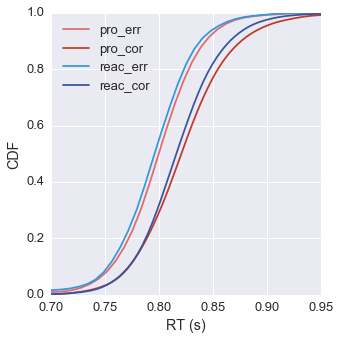

In [77]:
coxgo = cox[cox.ttype=='go']
coxssg = cox[(cox.ttype=='stop')&(cox.response==1)]    

sns.set(style='darkgrid', font_scale=1.3)
f,ax=plt.subplots(1, figsize=(5,5))
eclrs = {'pro':reds[0], 'reac':blues[0]}
cclrs = {'pro':reds[-1], 'reac':blues[-1]}

for c, cdf in coxgo.groupby('Cond'):
    sns.kdeplot(coxssg[coxssg['Cond']==c].rt, cumulative=True, label=c+'_err', color=eclrs[c])
    sns.kdeplot(cdf[cdf.response==1].rt, cumulative=True, label=c+'_cor', color=cclrs[c])

sns.despine()
ax.set_ylabel('CDF')
ax.set_xlabel('RT (s)')
ax.set_xlim(.7,.95)
plt.tight_layout()
#plt.savefig('/home/kyle/Dropbox/Projects/Coxon/RT_Distributions.png', dpi=300)